# Comparing Changes 

### Mexico level 1 - states

In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
df = gpd.read_parquet("../geoplanar/datasets/usmex/usmex_1.parquet")

FileNotFoundError: ../geoplanar/datasets/usmex/usmex_1.parquet

In [3]:
df2 = gpd.read_parquet("../geoplanar/datasets/usmex/final_usmex1.parquet")

FileNotFoundError: ../geoplanar/datasets/usmex/final_usmex1.parquet

<AxesSubplot:>

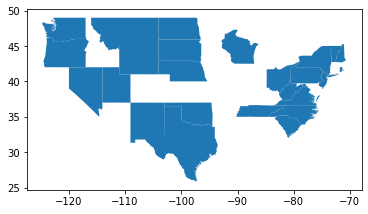

In [4]:
df2.tail(25).plot()

<AxesSubplot:>

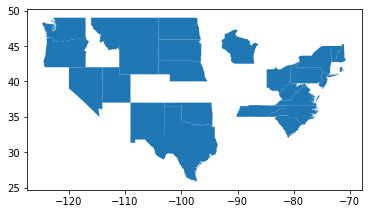

In [5]:
df.tail(25).plot()

In [6]:
tx = df[df.NAME_1=="Texas"] 

In [7]:
tx.geometry

73    MULTIPOLYGON (((-97.21570 25.97014, -97.21570 ...
Name: geometry, dtype: geometry

In [8]:
tx2 = df2[df2.NAME_1=="Texas"] 

In [9]:
tx2.geometry

73    MULTIPOLYGON (((-97.13000 27.90417, -97.12972 ...
Name: geometry, dtype: geometry

### checking whether centroid changed

Need to:

1. find all centroids before and after and compare whcih changed and plot them

In [10]:
c = df.centroid
c

/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0     POINT (-102.36194 22.00644)
1     POINT (-115.09356 30.55562)
2     POINT (-112.04916 25.92125)
3      POINT (-90.31599 18.84861)
4      POINT (-92.46324 16.48400)
5     POINT (-106.46907 28.80844)
6     POINT (-102.04406 27.29527)
7     POINT (-104.09489 19.13189)
8      POINT (-99.13941 19.27689)
9     POINT (-104.91340 24.92361)
10    POINT (-101.01261 20.90543)
11     POINT (-99.92236 17.66891)
12     POINT (-98.88711 20.47956)
13    POINT (-103.61314 20.58084)
14     POINT (-99.64537 19.35596)
15    POINT (-101.87800 19.20734)
16     POINT (-99.07496 18.74208)
17    POINT (-104.85006 21.80073)
18     POINT (-99.96897 25.57259)
19     POINT (-96.44890 16.96959)
20     POINT (-97.90009 19.00607)
21     POINT (-99.84580 20.85518)
22     POINT (-88.11572 19.63461)
23    POINT (-100.41651 22.58546)
24    POINT (-107.48229 24.99920)
25    POINT (-110.81083 29.69284)
26     POINT (-92.58215 17.93123)
27     POINT (-98.66870 24.27637)
28     POINT (-98.16855 19.42858)
29     POINT (

In [11]:
c2 = df2.centroid
c2

/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0     POINT (-102.36194 22.00644)
1     POINT (-115.09356 30.55562)
2     POINT (-112.04916 25.92125)
3      POINT (-90.31599 18.84861)
4      POINT (-92.46324 16.48400)
5     POINT (-106.46907 28.80844)
6     POINT (-102.04406 27.29527)
7     POINT (-104.09489 19.13189)
8      POINT (-99.13941 19.27689)
9     POINT (-104.91340 24.92361)
10    POINT (-101.01261 20.90543)
11     POINT (-99.92236 17.66891)
12     POINT (-98.88711 20.47956)
13    POINT (-103.61314 20.58084)
14     POINT (-99.64537 19.35596)
15    POINT (-101.87800 19.20734)
16     POINT (-99.07496 18.74208)
17    POINT (-104.85006 21.80073)
18     POINT (-99.96897 25.57259)
19     POINT (-96.44890 16.96959)
20     POINT (-97.90009 19.00607)
21     POINT (-99.84580 20.85518)
22     POINT (-88.11572 19.63461)
23    POINT (-100.41651 22.58546)
24    POINT (-107.48229 24.99920)
25    POINT (-110.81083 29.69284)
26     POINT (-92.58215 17.93123)
27     POINT (-98.66870 24.27637)
28     POINT (-98.16855 19.42858)
29     POINT (

<AxesSubplot:>

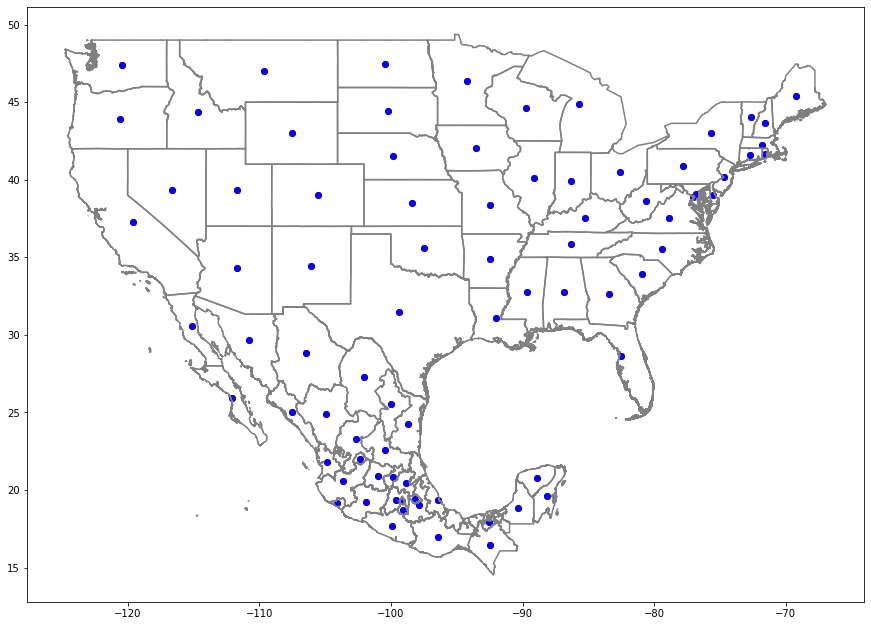

In [12]:
base = df2.geometry.boundary.plot(edgecolor='grey', figsize=(15, 15))
c.plot(ax=base, color='red')
c2.plot(ax=base, color='blue')

In [13]:
import folium

In [14]:
# df with planar enforcement violations
m = c.explore(
     color='red',
     tiles="CartoDB positron", # use "CartoDB positron" tiles
)

# df with corrections
c2.explore(
     m=m, # pass the map object
     color='blue',
     tooltip=False
)



folium.LayerControl().add_to(m)  # layer control

m # execute the map

In [15]:
tx_c = tx.centroid
tx_c

/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


73    POINT (-99.35798 31.49105)
dtype: geometry

In [16]:
tx2_c = tx2.centroid
tx2_c

/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


73    POINT (-99.35809 31.49128)
dtype: geometry

### checking whether area changed

need to:
1. check all areas before and after
2. compare /contrast
3. explicitly state which ones changed

In [61]:
df= df.to_crs(3857)
df ["area"] = df['geometry'].area


In [63]:
df

,index,ADM1_ES,ADM1_PCODE,ADM1_REF,ADM1ALT1ES,ADM1ALT2ES,ADM0_ES,ADM0_PCODE,date,validOn,...,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,area
0,0,Aguascalientes,MX01,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,6.564694e+09
1,1,Baja California,MX02,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,9.864037e+10
2,2,Baja California Sur,MX03,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,8.940608e+10
3,3,Campeche,MX04,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,6.230558e+10
4,4,Chiapas,MX07,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,7.949049e+10
5,5,Chihuahua,MX08,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,3.236569e+11
6,6,Coahuila de Zaragoza,MX05,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,1.928265e+11
7,7,Colima,MX06,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,6.491570e+09
8,8,Distrito Federal,MX09,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,1.686261e+09
9,9,Durango,MX10,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,None,1.507112e+11


In [65]:
df= df.to_crs(3857)
df2 ["area"] = df2['geometry'].area

In [66]:
print(df.area)

0     6.564694e+09
1     9.864037e+10
2     8.940608e+10
3     6.230558e+10
4     7.949049e+10
5     3.236569e+11
6     1.928265e+11
7     6.491570e+09
8     1.686261e+09
9     1.507112e+11
10    3.525119e+10
11    7.036947e+10
12    2.384785e+10
13    9.014898e+10
14    2.524337e+10
15    6.605160e+10
16    5.469732e+09
17    3.253768e+10
18    7.921266e+10
19    1.018607e+11
20    3.859014e+10
21    1.345531e+10
22    4.911296e+10
23    7.207041e+10
24    6.791045e+10
25    2.397296e+11
26    2.690582e+10
27    9.444243e+10
28    4.518131e+09
29    7.978919e+10
30    4.532506e+10
31    8.966546e+10
32    1.897535e+11
33    4.342640e+11
34    2.052619e+11
35    6.496472e+11
36    4.475472e+11
37    2.308986e+10
38    8.784677e+09
39    2.746514e+08
40    1.923441e+11
41    2.157659e+11
42    4.246809e+11
43    2.572545e+11
44    1.607135e+11
45    2.650012e+11
46    3.484897e+11
47    1.665085e+11
48    1.651900e+11
49    1.710790e+11
50    4.263126e+10
51    3.840615e+10
52    4.9958

In [67]:
print(df2.area)

0     6.564694e+09
1     9.864037e+10
2     8.940608e+10
3     6.230558e+10
4     7.949049e+10
5     3.236569e+11
6     1.928265e+11
7     6.491570e+09
8     1.686261e+09
9     1.507112e+11
10    3.525119e+10
11    7.036947e+10
12    2.384785e+10
13    9.014898e+10
14    2.524337e+10
15    6.605160e+10
16    5.469732e+09
17    3.253768e+10
18    7.921266e+10
19    1.018607e+11
20    3.859014e+10
21    1.345531e+10
22    4.911296e+10
23    7.207041e+10
24    6.791045e+10
25    2.397296e+11
26    2.690582e+10
27    9.444243e+10
28    4.518131e+09
29    7.978919e+10
30    4.532506e+10
31    8.966546e+10
32    1.897535e+11
33    4.342480e+11
34    2.052619e+11
35    6.496066e+11
36    4.475472e+11
37    2.308986e+10
38    8.784677e+09
39    2.746514e+08
40    1.923441e+11
41    2.157659e+11
42    4.246809e+11
43    2.572545e+11
44    1.607135e+11
45    2.650012e+11
46    3.484897e+11
47    1.665085e+11
48    1.651900e+11
49    1.710791e+11
50    4.263126e+10
51    3.840615e+10
52    4.9958

In [48]:
df2['area'].isin(df['area']).value_counts()


False    63
True     18
Name: area, dtype: int64

In [49]:
df2 ['df2-df'] = df2['area'] - df['area']

In [51]:
df2.head()

,index,ADM1_ES,ADM1_PCODE,ADM1_REF,ADM1ALT1ES,ADM1ALT2ES,ADM0_ES,ADM0_PCODE,date,validOn,...,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,area,df2-df
0,0,Aguascalientes,MX01,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,6.564694e+09,0.000000
1,1,Baja California,MX02,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,9.864037e+10,0.000168
2,2,Baja California Sur,MX03,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,8.940608e+10,0.000000
3,3,Campeche,MX04,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,6.230558e+10,0.000008
4,4,Chiapas,MX07,None,None,None,México,MX,2020-06-23,2021-06-18,...,None,None,None,None,None,None,None,None,7.949049e+10,0.000610


In [69]:
df.iloc[49].area # texas area

171079045306.25223

In [70]:
df2.iloc[49].area # texas area

171079051964.87817

In [71]:
df2['df2-df'].sort_values(ascending=True)

73   -5.168286e+07
35   -4.061619e+07
33   -1.604408e+07
61   -2.148610e+05
63   -1.708984e-03
13   -1.388550e-03
50   -1.113892e-03
54   -1.098633e-03
43   -7.934570e-04
56   -7.324219e-04
65   -6.408691e-04
34   -5.493164e-04
51   -3.967285e-04
9    -3.356934e-04
27   -3.204346e-04
6    -3.051758e-04
25   -2.441406e-04
15   -2.212524e-04
78   -1.831055e-04
22   -1.220703e-04
11   -7.629395e-05
80   -6.103516e-05
68   -6.103516e-05
75   -4.577637e-05
37   -1.525879e-05
77    0.000000e+00
48    0.000000e+00
44    0.000000e+00
64    0.000000e+00
69    0.000000e+00
39    0.000000e+00
38    0.000000e+00
70    0.000000e+00
74    0.000000e+00
0     0.000000e+00
7     0.000000e+00
30    0.000000e+00
28    0.000000e+00
2     0.000000e+00
26    0.000000e+00
17    0.000000e+00
8     0.000000e+00
21    0.000000e+00
14    3.814697e-06
16    4.768372e-06
3     7.629395e-06
12    1.525879e-05
1     1.678467e-04
59    1.754761e-04
47    1.831055e-04
31    1.983643e-04
72    2.136230e-04
66    2.4414